In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import requests
from bs4 import BeautifulSoup
import re

In [3]:
df = pd.read_csv("/home/tatane/data/udemy/udemy_courses_augmented.csv", parse_dates=["published_timestamp"])
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,rating-number
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,4.0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,4.1
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,4.2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,4.6
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,4.4


In [5]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [6]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()

In [28]:
nb_row = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"ligne dupliquée supprimée : {abs(df.shape[0] - nb_row)}")

ligne dupliquée supprimée : 6


In [29]:
nb_row = df.shape[0]
df.dropna(inplace=True)
print(f"ligne contenant NaN supprimée : {abs(df.shape[0] - nb_row)}")

ligne contenant NaN supprimée : 0


<AxesSubplot:>

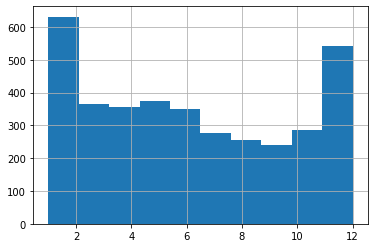

In [34]:
df["month"] = df["published_timestamp"].dt.month
df["month"].hist()